In [ ]:
from utils import NuImagesDataSet 
import numpy as np 
from matplotlib import pyplot as plt 
import tensorflow as tf

dataroot = '../../../../datasets/nuimages'
nuimd = NuImagesDataSet(dataroot)

# Visulalize images and semantic masks 

67279 16445


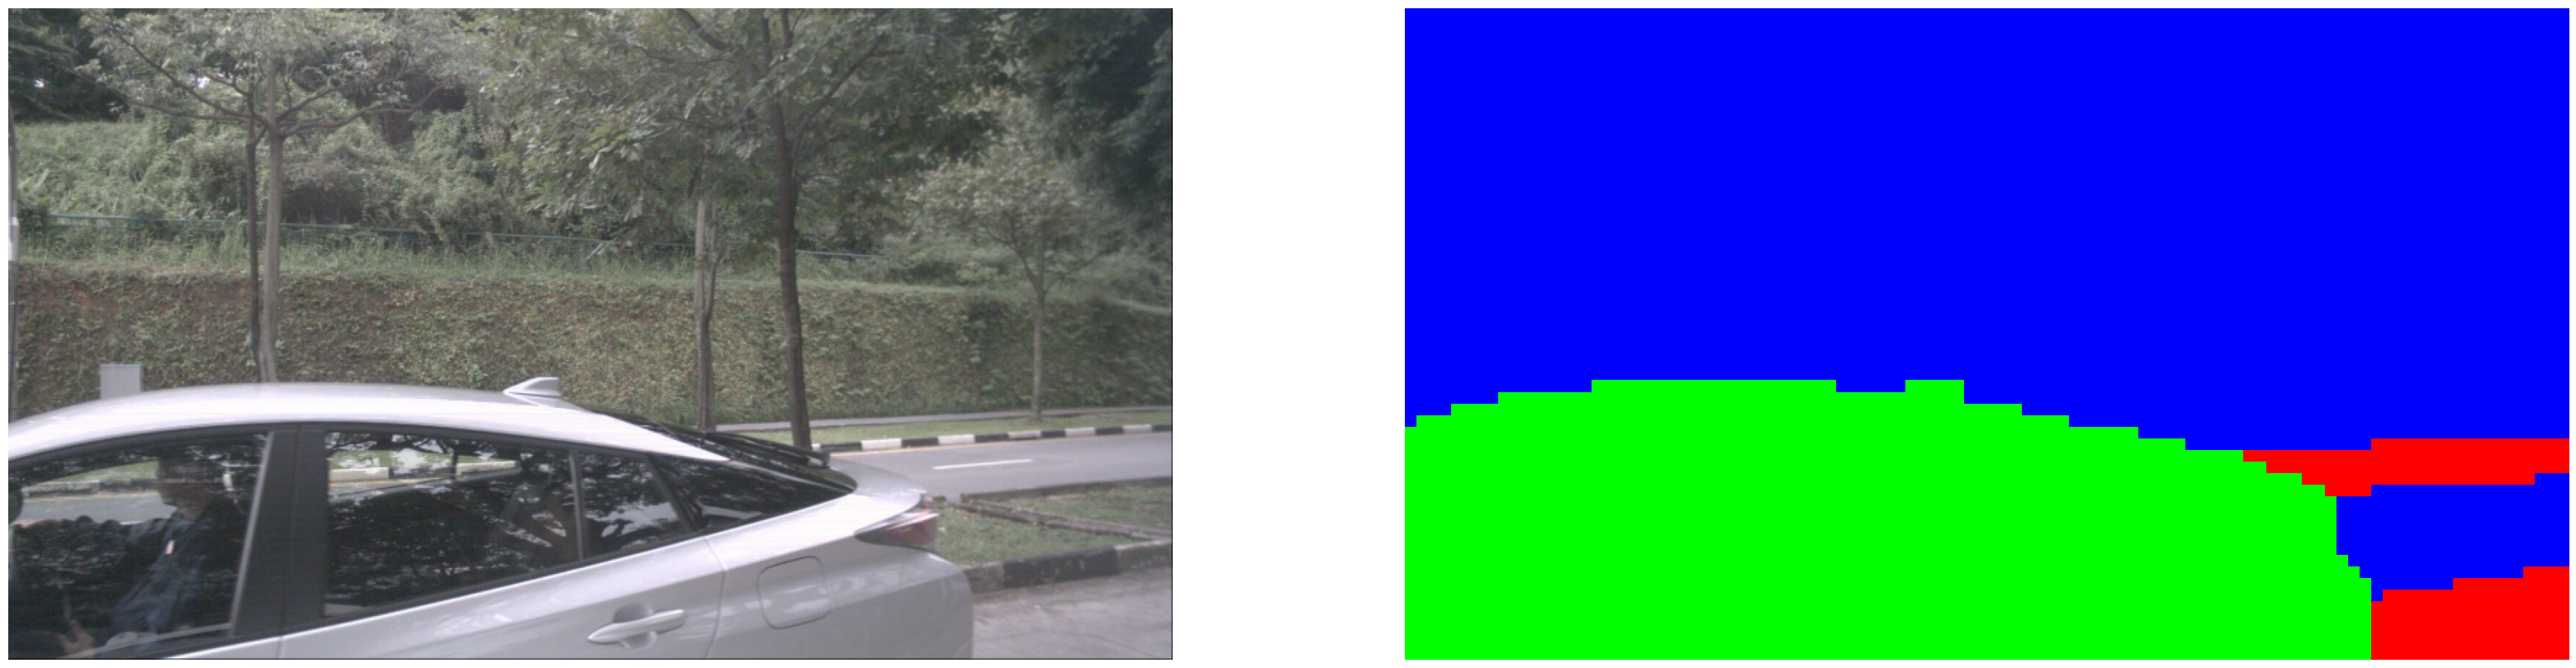

shape of segmentation mask (56, 100, 3), dtype = float32


In [5]:
training_samples = nuimd.nuim_train.sample
val_samples = nuimd.nuim_val.sample
train_file_paths, val_file_paths = nuimd.get_cameras_train_val_file_paths()
print(len(training_samples), len(val_samples))

idx = 14# 9,14,17,19,23,24
image = nuimd.get_image(train_file_paths[idx]).numpy()/255.0
mask = nuimd.get_samples_mask(training_samples[idx], size=(56,100),version='train')

plt.figure(figsize=(40,40))

plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(image)

plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(mask)

plt.show()
print(f'shape of segmentation mask {mask.shape}, dtype = {mask.dtype}')

# Calculate semantic segmentation masks and save them

In [6]:

file_path_train = '../../../../datasets/nuim_semantic_train/'
file_path_val = '../../../../datasets/nuim_semantic_val/'

for idx, sample in enumerate(training_samples):
    mask = nuimd.get_samples_mask(sample, version='train')
    nuimd.save_as_binary(mask, file_path_train+str(idx)+'.txt')
    if idx%5000 ==0: print(f'{idx} training samples saved')

for idx, sample in enumerate(val_samples):
    mask = nuimd.get_samples_mask(sample, version='val')
    nuimd.save_as_binary(mask, file_path_val+str(idx)+'.txt')
    if idx%5000 ==0: print(f'{idx} val samples saved')

0 training samples saved
5000 training samples saved
10000 training samples saved
15000 training samples saved
20000 training samples saved
25000 training samples saved
30000 training samples saved
35000 training samples saved
40000 training samples saved
45000 training samples saved
50000 training samples saved
55000 training samples saved
60000 training samples saved
65000 training samples saved
Loaded 25 category(s) in 0.008s,
Loaded 17995 surface_ann(s) in 0.615s,
Loaded 136074 object_ann(s) in 1.090s,
0 val samples saved
5000 val samples saved
10000 val samples saved
15000 val samples saved


# Load saved semantic segmentation masks and Visualize

In [7]:
file_path_train = '../../../../datasets/nuim_semantic_train/'
file_path_val = '../../../../datasets/nuim_semantic_val/'

semantic_train_files_paths, semantic_val_files_paths = nuimd.get_train_val_file_paths(file_path_train, file_path_val)
print(len(semantic_train_files_paths), len(semantic_val_files_paths))

camera_train_file_paths, camera_val_file_paths = nuimd.get_cameras_train_val_file_paths()
print(len(camera_train_file_paths), len(camera_val_file_paths))

semantic_train_dataset = tf.data.Dataset.from_tensor_slices(semantic_train_files_paths).map(lambda file_path: nuimd.read_binary_file(file_path, dtype=tf.float32, shape=(56,100,3)))
semantic_val_dataset = tf.data.Dataset.from_tensor_slices(semantic_val_files_paths).map(lambda file_path: nuimd.read_binary_file(file_path, dtype=tf.float32, shape=(56,100,3)))


67279 16445
67279 16445


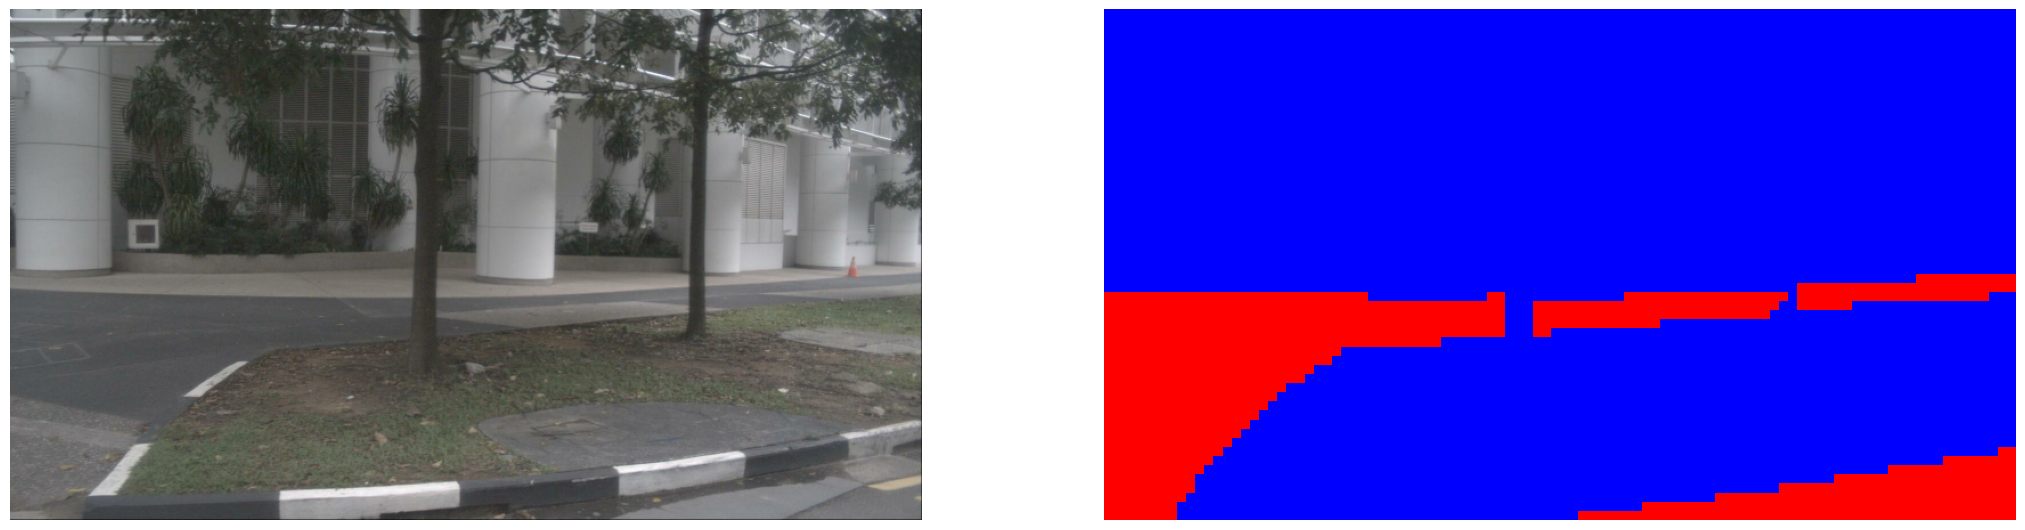

In [12]:
idx = 14000

training_samples = nuimd.nuim_train.sample
val_samples = nuimd.nuim_val.sample

image = nuimd.get_image(camera_train_file_paths[idx]).numpy()/255.0
mask_calc = nuimd.get_samples_mask(training_samples[idx], size=(900,1600),version='train')

for x in semantic_train_dataset.skip(idx):
    mask =x
    break

plt.figure(figsize=(40,40))

plt.subplot(1,3,1)
plt.axis(False)
plt.imshow(image)

plt.subplot(1,3,2)
plt.axis(False)
plt.imshow(mask)

plt.show()